In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:

import numpy as np


class KMeans:
    """K-Means Class"""

    def __init__(self, data, num_clusters):
        """K-Means class constructor.
        :param data: training dataset.
        :param num_clusters: number of cluster into which we want to break the dataset.
        """
        self.data = data
        self.num_clusters = num_clusters

    def train(self, max_iterations):
        """Function performs data clustering using K-Means algorithm
        :param max_iterations: maximum number of training iterations.
        """

        # Generate random centroids based on training set.
        centroids = KMeans.centroids_init(self.data, self.num_clusters)

        # Init default array of closest centroid IDs.
        num_examples = self.data.shape[0]
        closest_centroids_ids = np.empty((num_examples, 1))

        # Run K-Means.
        for _ in range(max_iterations):
            # Find the closest centroids for training examples.
            closest_centroids_ids = KMeans.centroids_find_closest(self.data, centroids)

            # Compute means based on the closest centroids found in the previous part.
            centroids = KMeans.centroids_compute(
                self.data,
                closest_centroids_ids,
                self.num_clusters
            )

        return centroids, closest_centroids_ids

    @staticmethod
    def centroids_init(data, num_clusters):
        """Initializes num_clusters centroids that are to be used in K-Means on the dataset X
        :param data: training dataset.
        :param num_clusters: number of cluster into which we want to break the dataset.
        """

        # Get number of training examples.
        num_examples = data.shape[0]

        # Randomly reorder indices of training examples.
        random_ids = np.random.permutation(num_examples)

        # Take the first K examples as centroids.
        centroids = data[random_ids[:num_clusters], :]

        # Return generated centroids.
        return centroids

    @staticmethod
    def centroids_find_closest(data, centroids):
        """Computes the centroid memberships for every example.
        Returns the closest centroids in closest_centroids_ids for a dataset X where each row is
        a single example. closest_centroids_ids = m x 1 vector of centroid assignments (i.e. each
        entry in range [1..K]).
        :param data: training dataset.
        :param centroids: list of centroid points.
        """

        # Get number of training examples.
        num_examples = data.shape[0]

        # Get number of centroids.
        num_centroids = centroids.shape[0]

        # We need to return the following variables correctly.
        closest_centroids_ids = np.zeros((num_examples, 1))

        # Go over every example, find its closest centroid, and store
        # the index inside closest_centroids_ids at the appropriate location.
        # Concretely, closest_centroids_ids(i) should contain the index of the centroid
        # closest to example i. Hence, it should be a value in the range 1...num_centroids.
        for example_index in range(num_examples):
            distances = np.zeros((num_centroids, 1))
            for centroid_index in range(num_centroids):
                distance_difference = data[example_index, :] - centroids[centroid_index, :]
                distances[centroid_index] = np.sum(distance_difference ** 2)
            closest_centroids_ids[example_index] = np.argmin(distances)

        return closest_centroids_ids

    @staticmethod
    def centroids_compute(data, closest_centroids_ids, num_clusters):
        """Compute new centroids.
        Returns the new centroids by computing the means of the data points assigned to
        each centroid.
        :param data: training dataset.
        :param closest_centroids_ids: list of closest centroid ids per each training example.
        :param num_clusters: number of clusters.
        """

        # Get number of features.
        num_features = data.shape[1]

        # We need to return the following variables correctly.
        centroids = np.zeros((num_clusters, num_features))

        # Go over every centroid and compute mean of all points that
        # belong to it. Concretely, the row vector centroids(i, :)
        # should contain the mean of the data points assigned to
        # centroid i.
        for centroid_id in range(num_clusters):
            closest_ids = closest_centroids_ids == centroid_id
            centroids[centroid_id] = np.mean(data[closest_ids.flatten(), :], axis=0)

        return centroids

In [4]:
data = pd.read_excel(r'C:\Users\qksru\Desktop\Univ\3_2\SoftWareApplication\MushroomDataset\4th\dataset.xlsx')
data.head(10)

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,poisonous,15.26,convex,cap-ornage,no-bruise-or-bleed,gill-white,16.95,17.09,stem-white,ring,woods,winter
1,poisonous,16.60,convex,cap-ornage,no-bruise-or-bleed,gill-white,17.99,18.19,stem-white,ring,woods,summer
2,poisonous,14.07,convex,cap-ornage,no-bruise-or-bleed,gill-white,17.80,17.74,stem-white,ring,woods,winter
3,poisonous,14.17,flat,cap-red,no-bruise-or-bleed,gill-white,15.77,15.98,stem-white,ring,woods,winter
4,poisonous,14.64,convex,cap-ornage,no-bruise-or-bleed,gill-white,16.53,17.20,stem-white,ring,woods,winter
5,poisonous,15.34,convex,cap-ornage,no-bruise-or-bleed,gill-white,17.84,18.79,stem-white,ring,woods,summer
6,poisonous,14.85,flat,cap-ornage,no-bruise-or-bleed,gill-white,17.71,16.89,stem-white,ring,woods,winter
7,poisonous,14.86,convex,cap-red,no-bruise-or-bleed,gill-white,17.03,17.44,stem-white,ring,woods,summer
8,poisonous,12.85,flat,cap-ornage,no-bruise-or-bleed,gill-white,17.27,18.69,stem-white,ring,woods,autumn
9,poisonous,13.55,flat,cap-red,no-bruise-or-bleed,gill-white,16.04,16.88,stem-white,ring,woods,winter


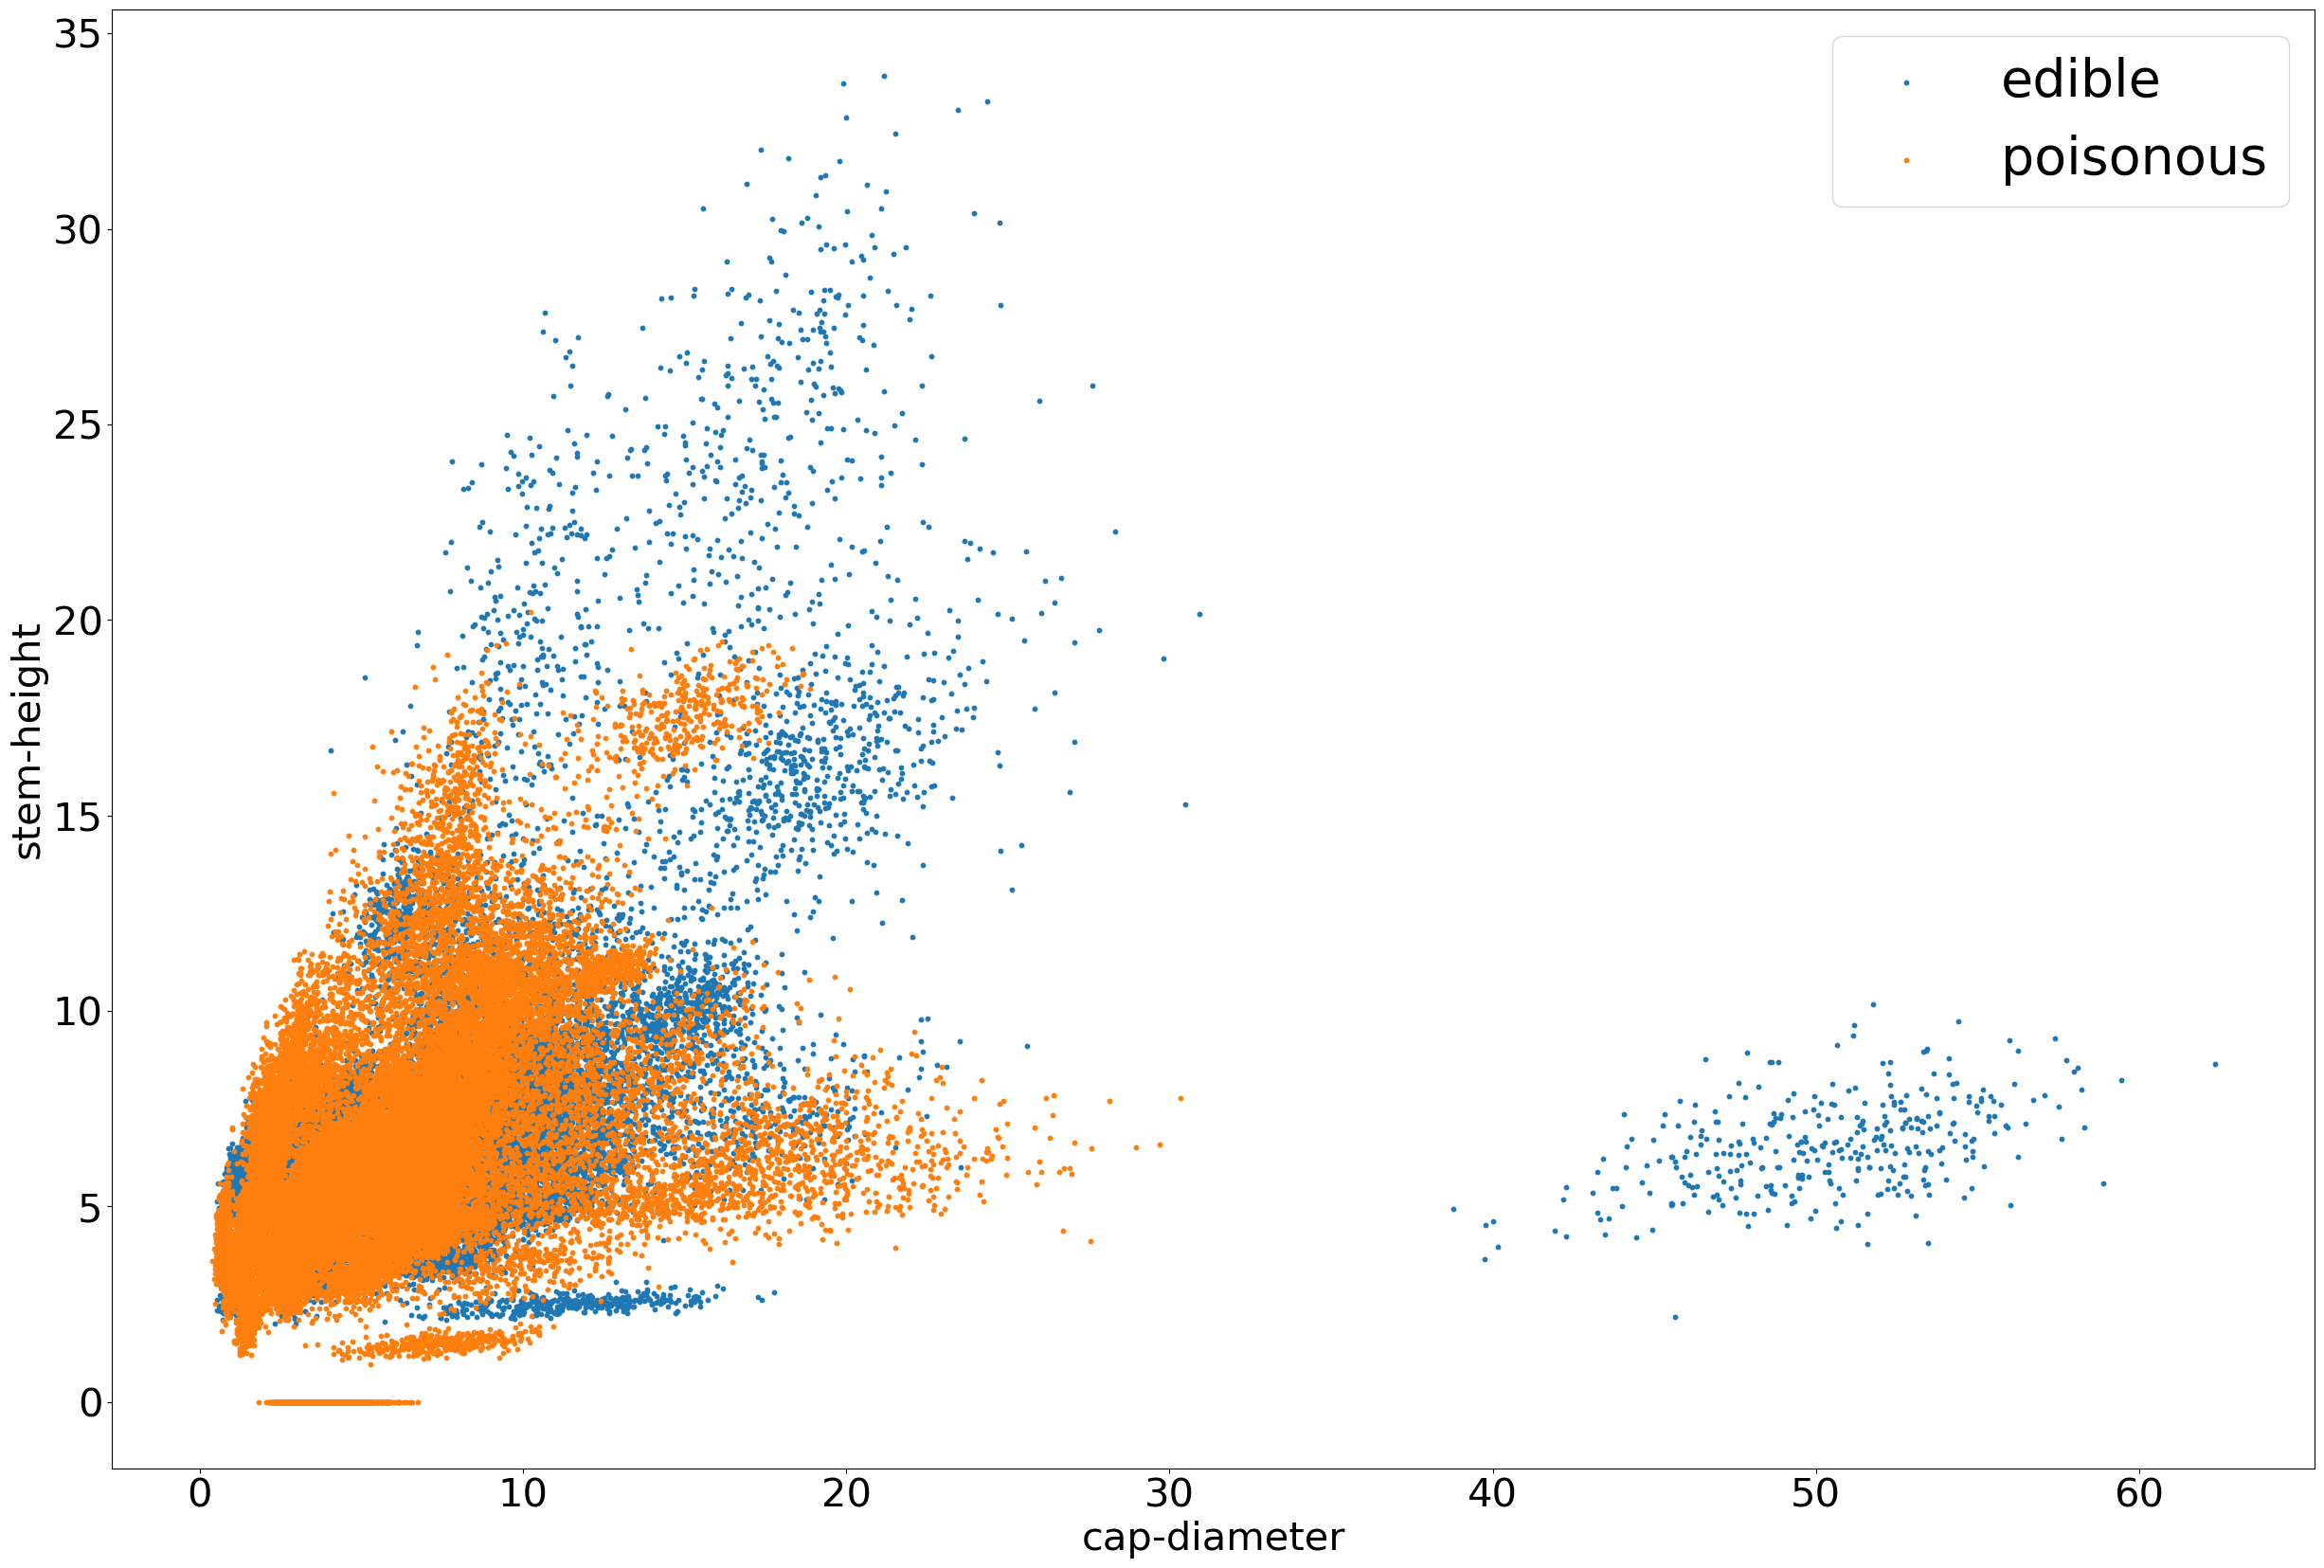

In [5]:
mstypes=['edible', 'poisonous']
x_axis = 'cap-diameter'
y_axis = 'stem-height'
plt.figure(figsize=(30,20))
#plt.subplot(1,2,2)

for mstype in mstypes:
    plt.scatter(
    data[x_axis][data['class']==mstype], 
    data[y_axis][data['class']==mstype],s=10,
    label=mstype
    )
# 축 label 색깔 하얀색으로, 글씨 크게. 
plt.tick_params(axis='x', labelsize=30)    
plt.tick_params(axis='y', labelsize=30)
plt.xlabel(x_axis, size=30)
plt.ylabel(y_axis, size=30)
plt.legend(fontsize=40)

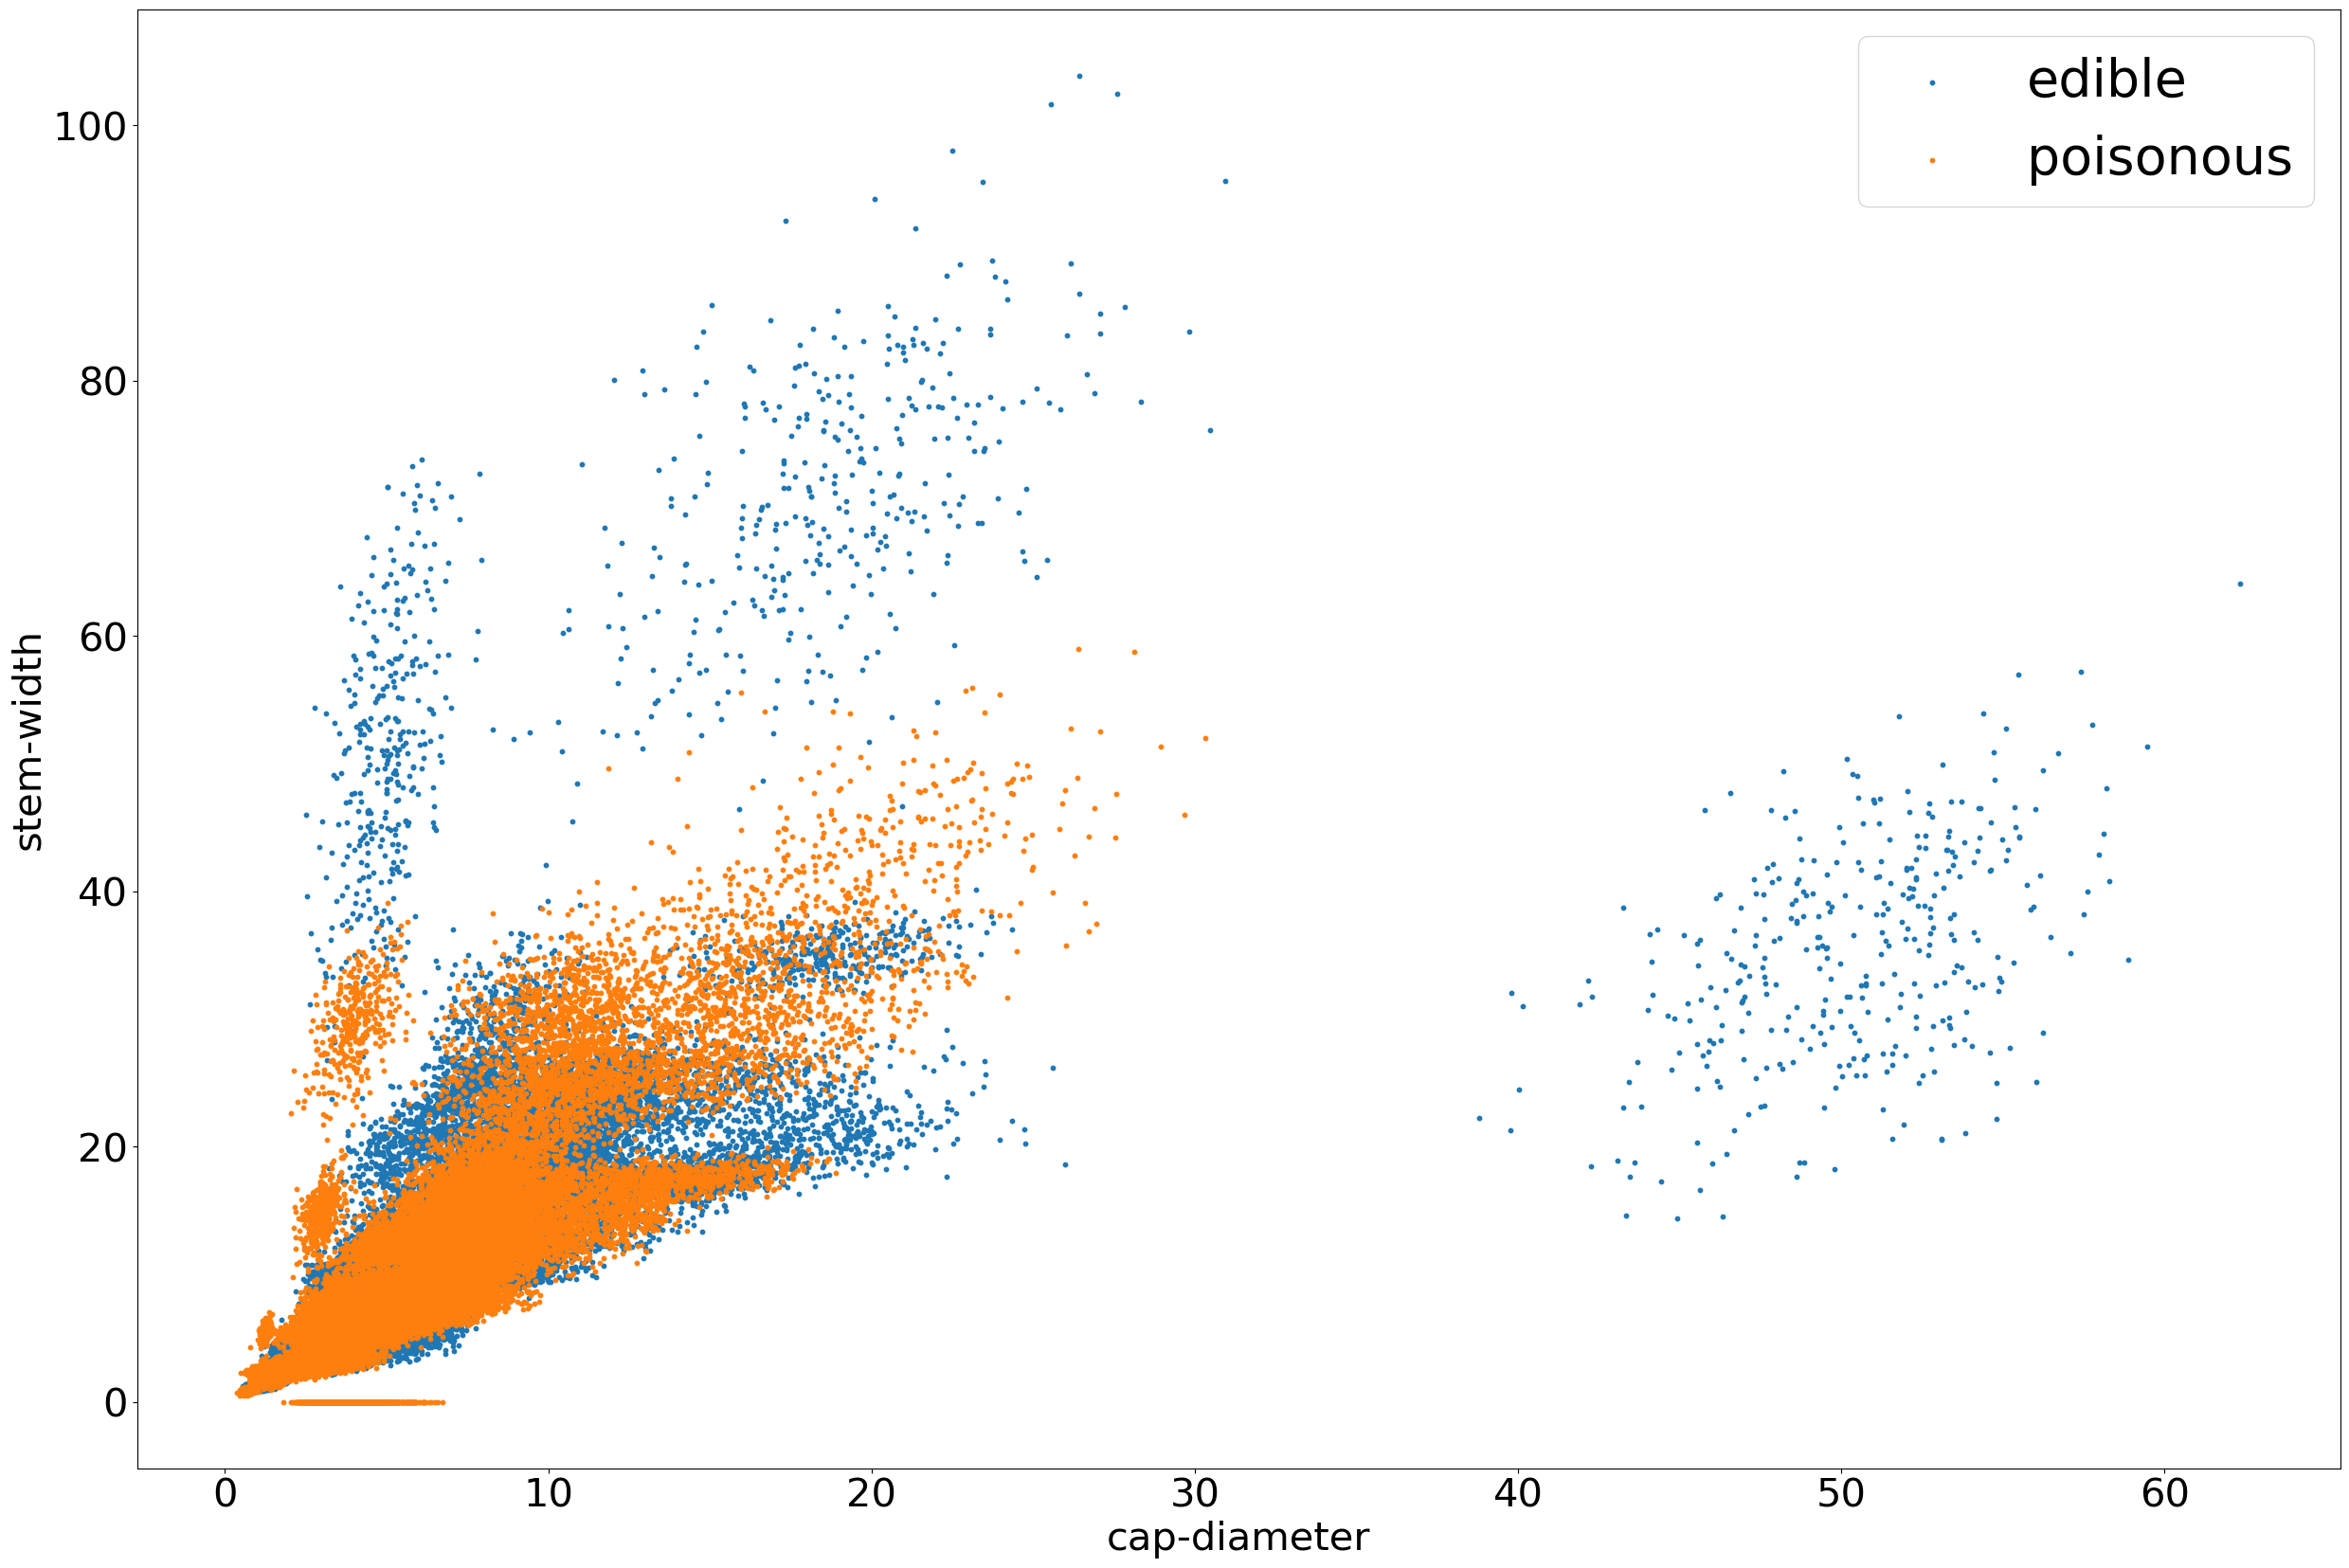

In [6]:
mstypes=['edible', 'poisonous']
x_axis = 'cap-diameter'
y_axis = 'stem-width'
plt.figure(figsize=(30,20))
#plt.subplot(1,2,2)

for mstype in mstypes:
    plt.scatter(
    data[x_axis][data['class']==mstype], 
    data[y_axis][data['class']==mstype],s=10,
    label=mstype
    )
# 축 label 색깔 하얀색으로, 글씨 크게. 
plt.tick_params(axis='x', labelsize=30)    
plt.tick_params(axis='y', labelsize=30)
plt.xlabel(x_axis, size=30)
plt.ylabel(y_axis, size=30)
plt.legend(fontsize=40)

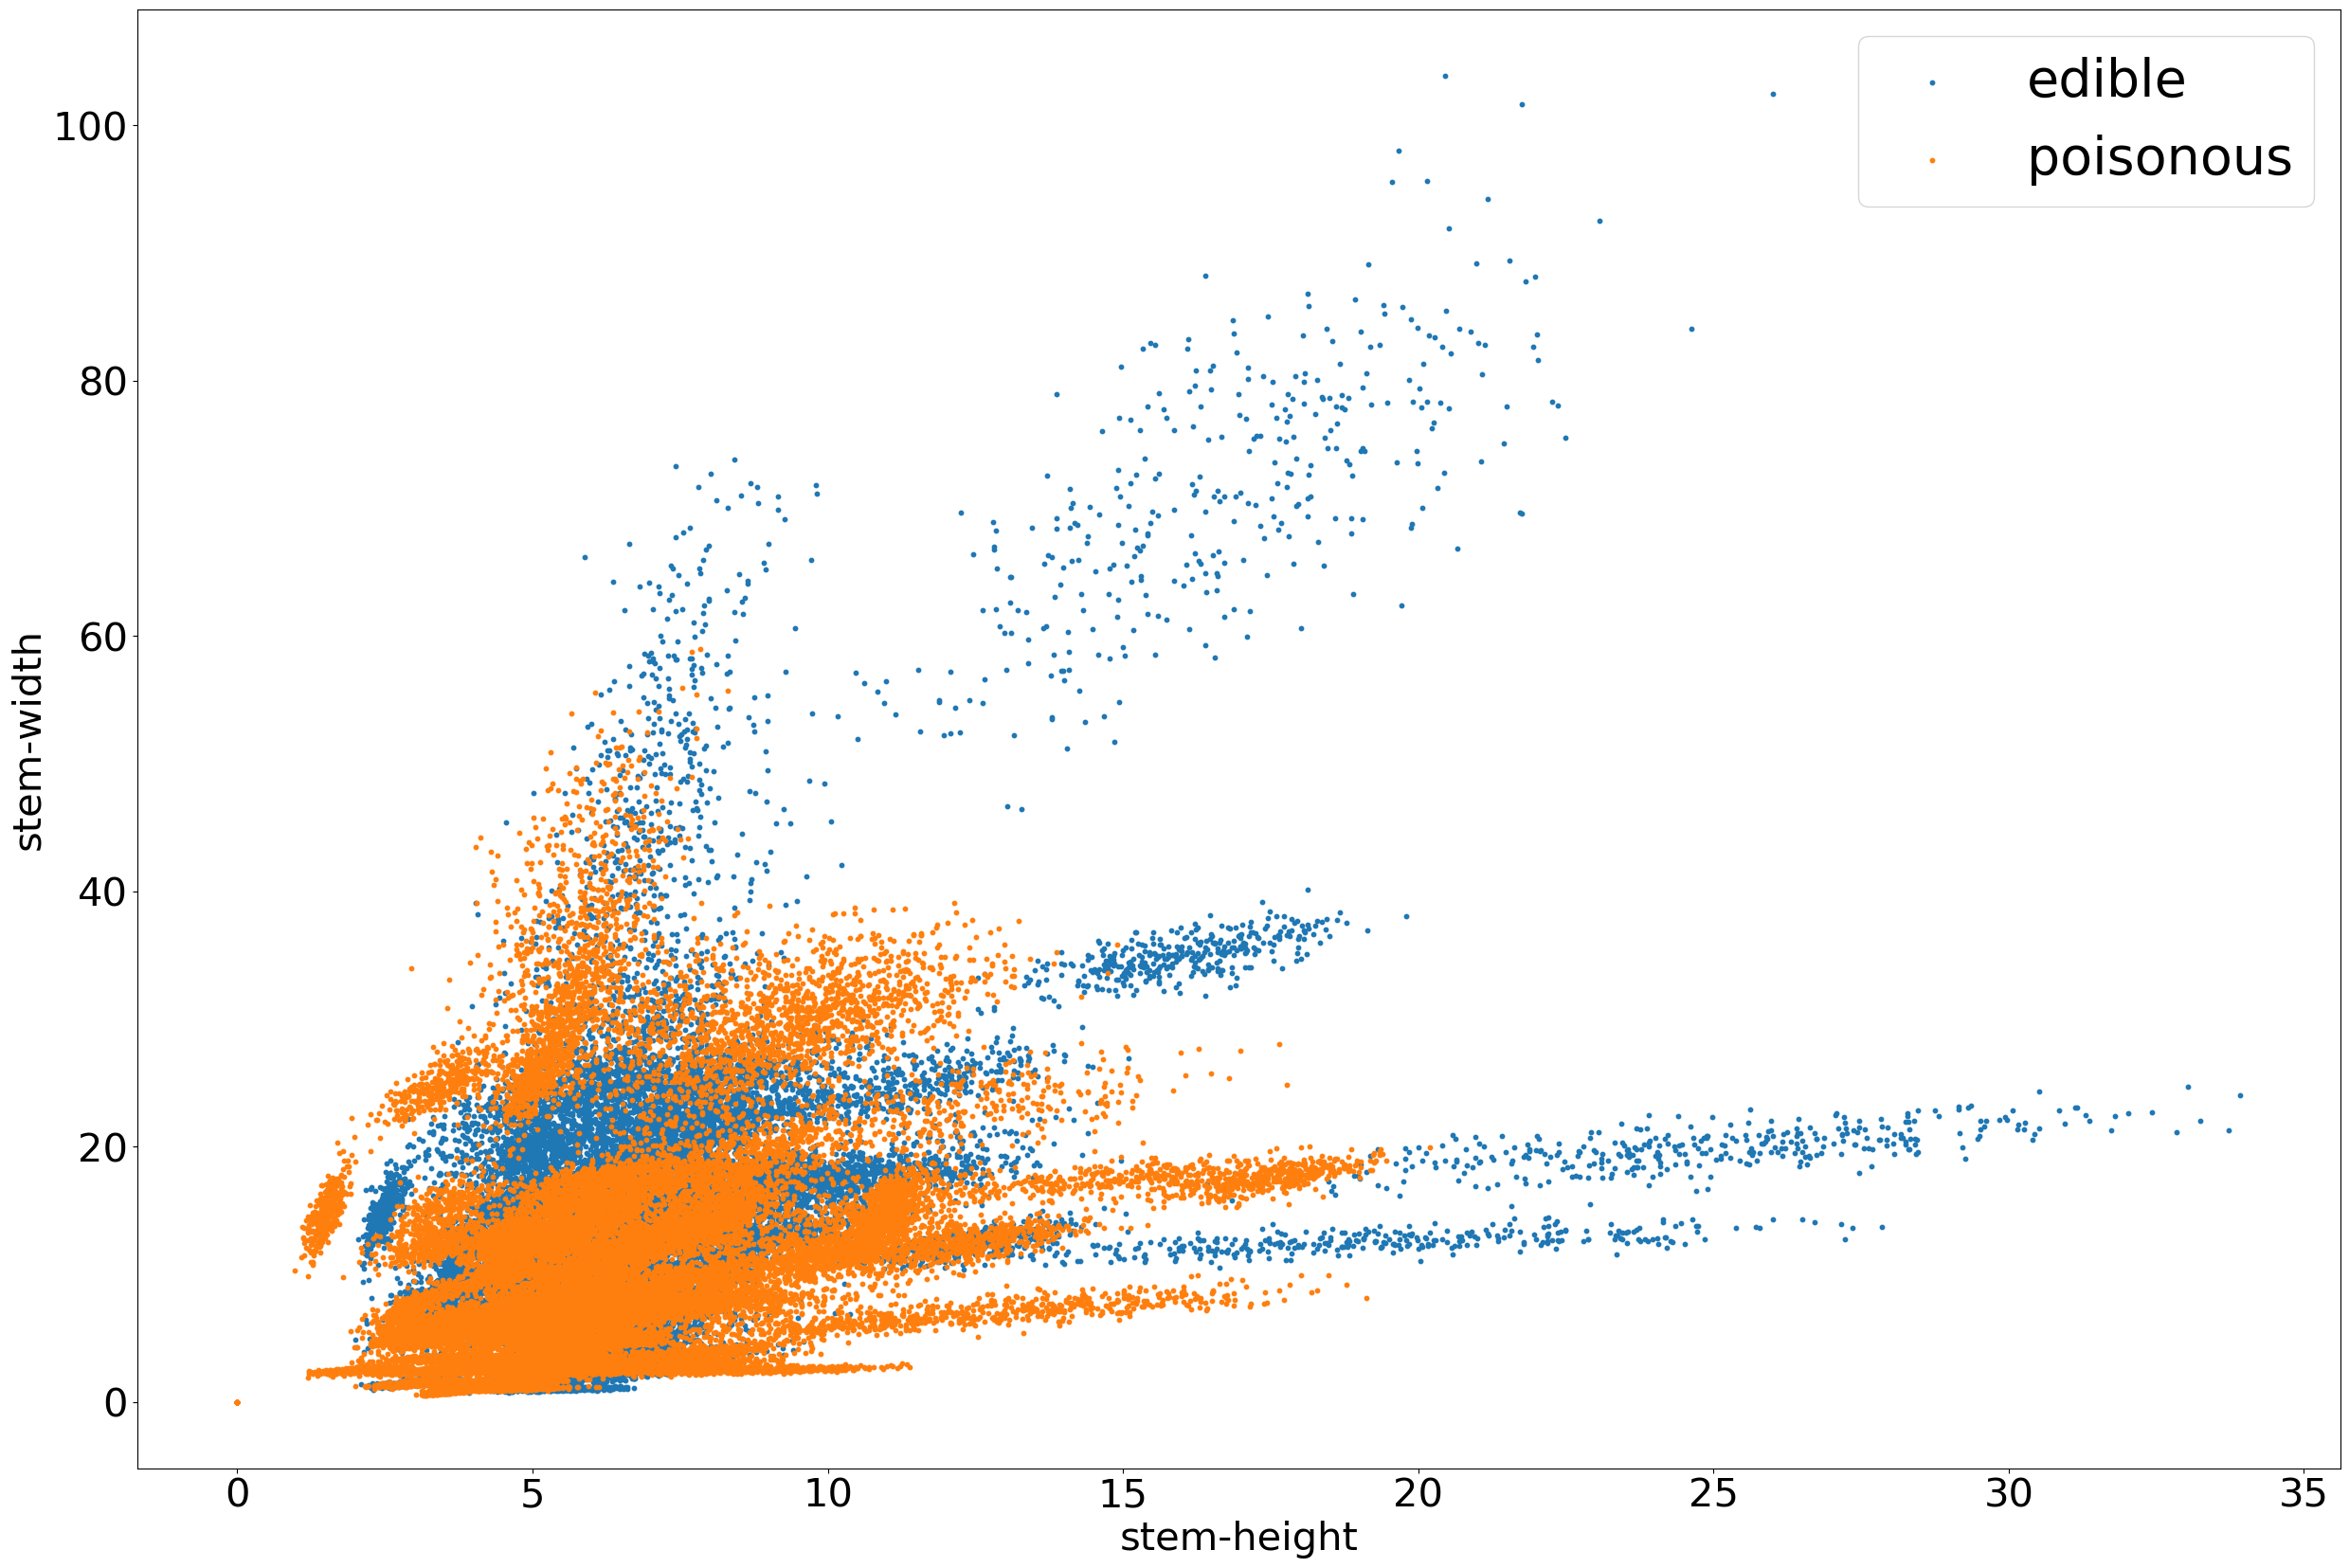

In [7]:
mstypes=['edible', 'poisonous']
x_axis = 'stem-height'
y_axis = 'stem-width'
plt.figure(figsize=(30,20))
#plt.subplot(1,2,2)

for mstype in mstypes:
    plt.scatter(
    data[x_axis][data['class']==mstype], 
    data[y_axis][data['class']==mstype],s=10,
    label=mstype
    )
# 축 label 색깔 하얀색으로, 글씨 크게. 
plt.tick_params(axis='x', labelsize=30)    
plt.tick_params(axis='y', labelsize=30)
plt.xlabel(x_axis, size=30)
plt.ylabel(y_axis, size=30)
plt.legend(fontsize=40)

x축 = stem-height, y축 = stem-color로 하여 시각화한 결과. 

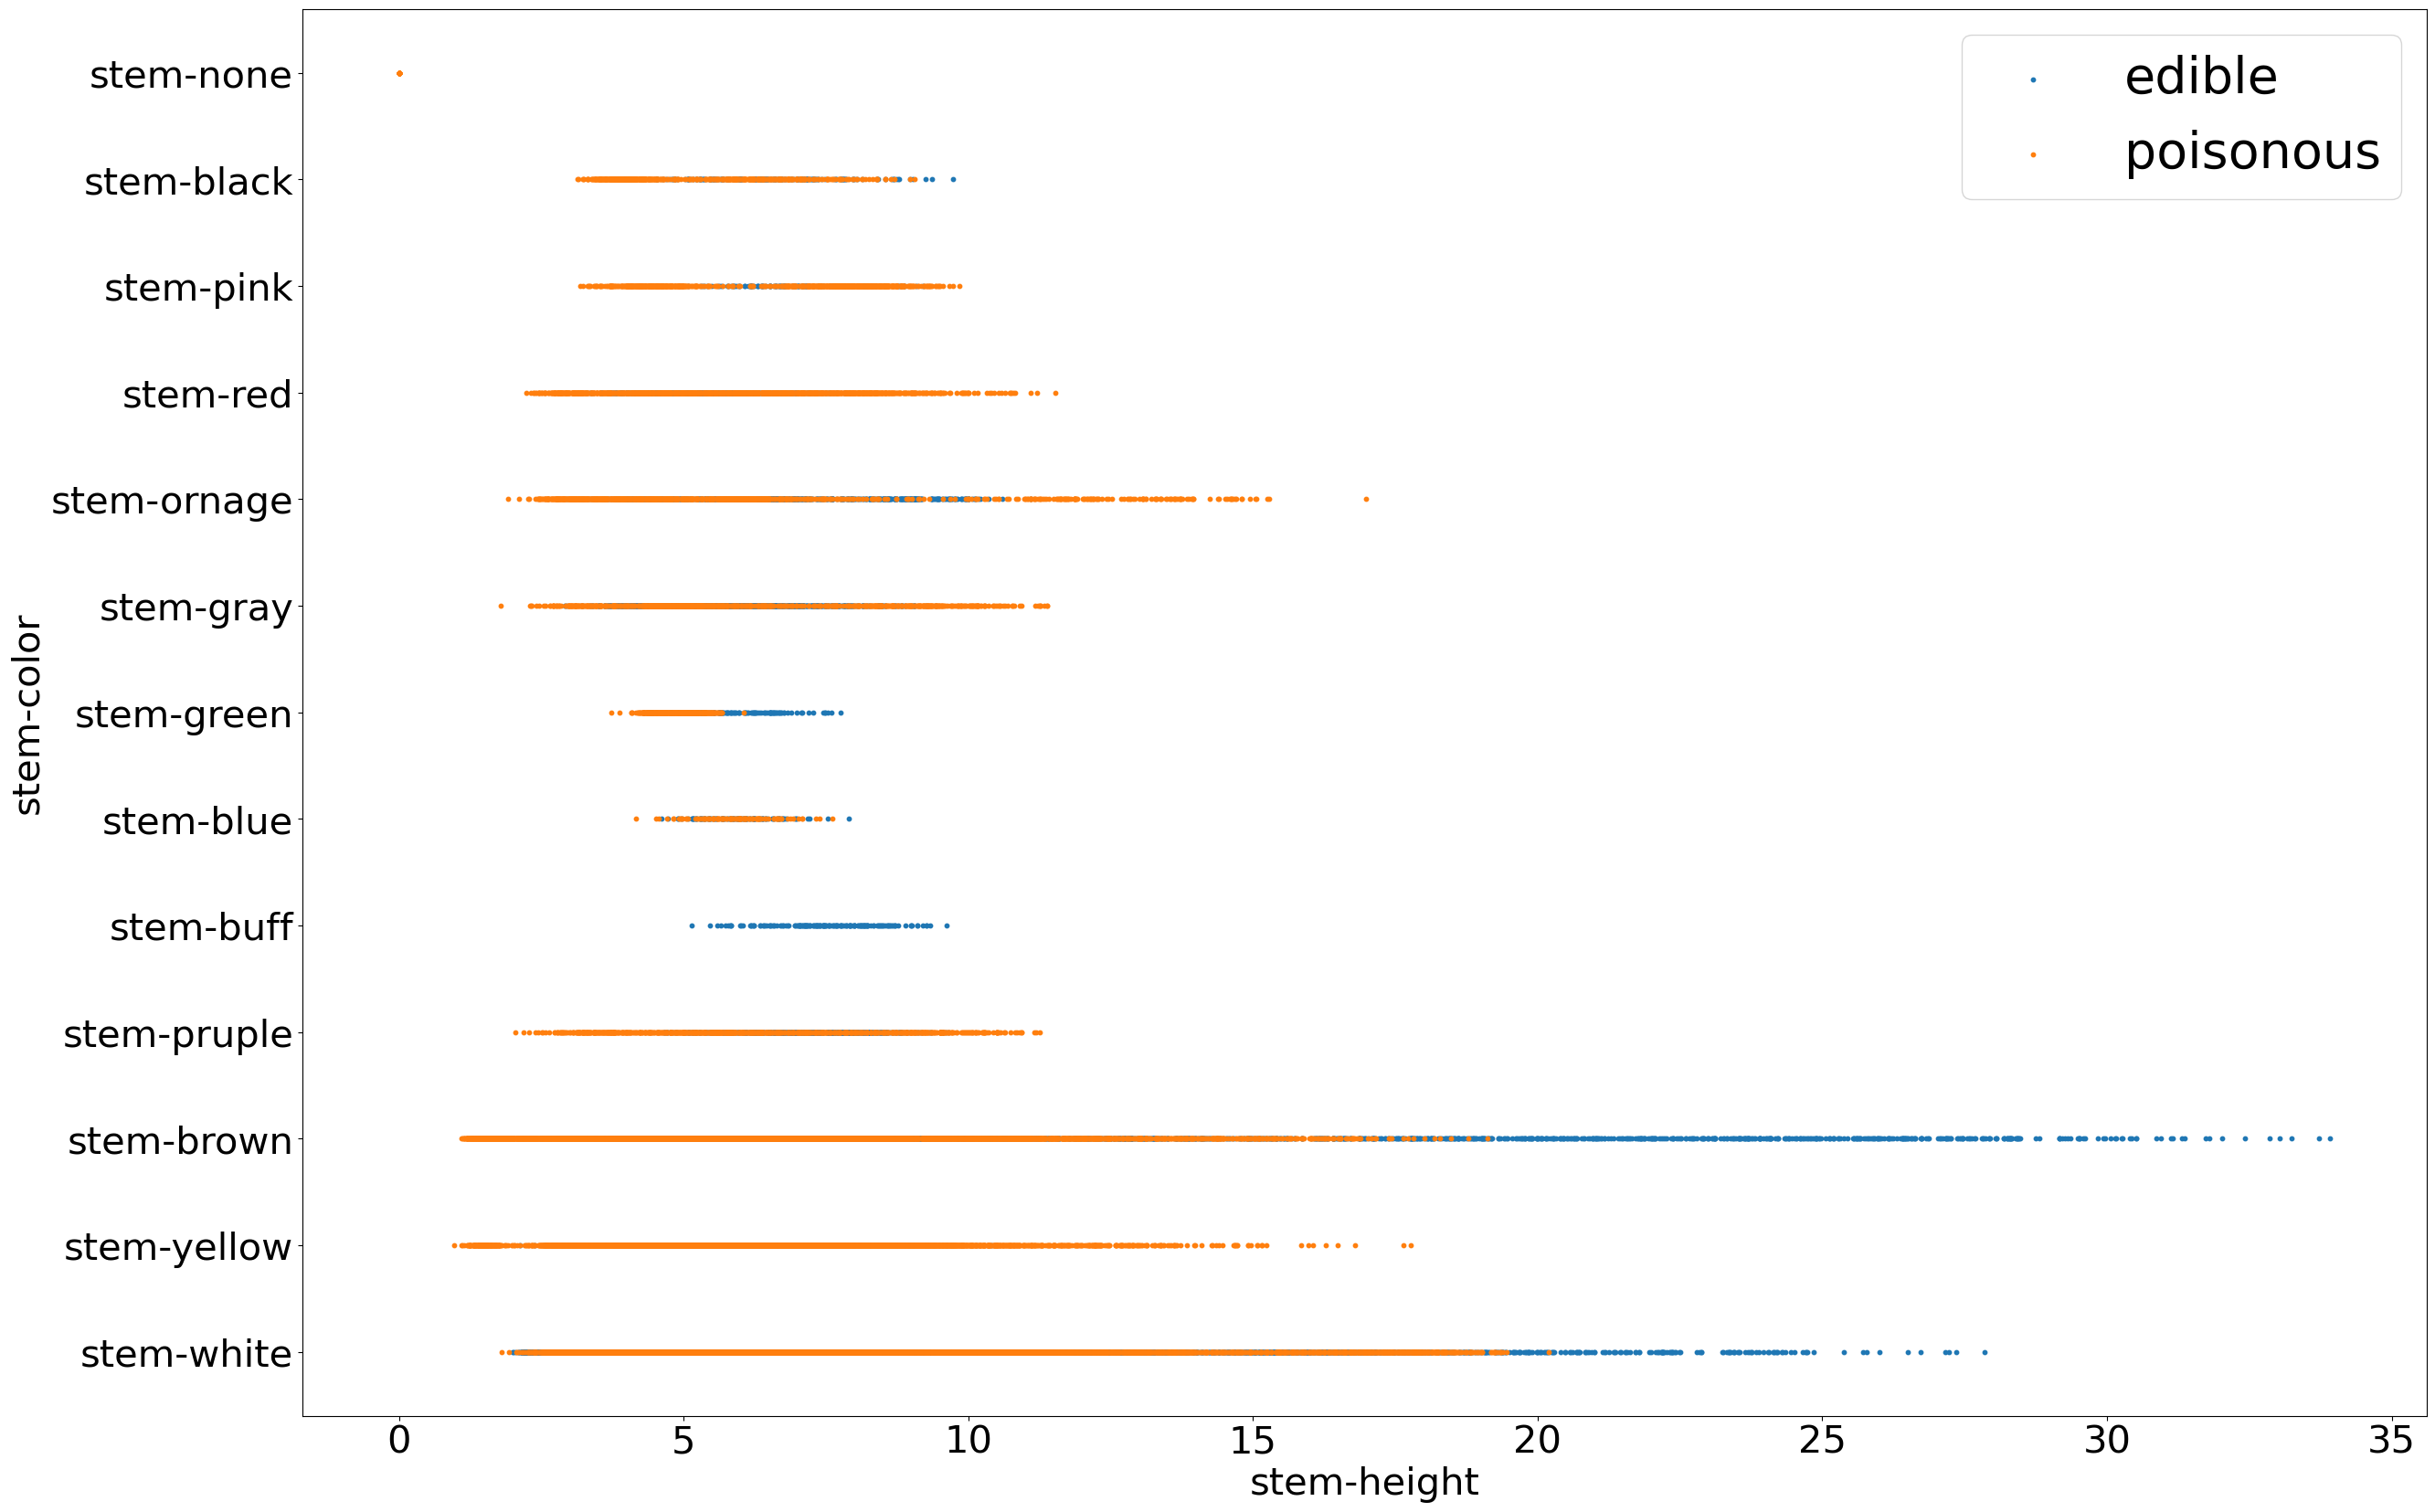

In [19]:
mstypes=['edible', 'poisonous']
x_axis = 'stem-height'
y_axis = 'stem-color'
plt.figure(figsize=(30,20))
#plt.subplot(1,2,2)

for mstype in mstypes:
    plt.scatter(
    data[x_axis][data['class']==mstype], 
    data[y_axis][data['class']==mstype],s=10,
    label=mstype
    )
# 축 label 색깔 하얀색으로, 글씨 크게. 
plt.tick_params(axis='x', labelsize=30)    
plt.tick_params(axis='y', labelsize=30)
plt.xlabel(x_axis, size=30)
plt.ylabel(y_axis, size=30)
plt.legend(fontsize=40)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
"""KMeans Module"""

import numpy as np


class KMeans:
    """K-Means Class"""

    def __init__(self, data, num_clusters):
        """K-Means class constructor.
        :param data: training dataset.
        :param num_clusters: number of cluster into which we want to break the dataset.
        """
        self.data = data
        self.num_clusters = num_clusters

    def train(self, max_iterations):
        """Function performs data clustering using K-Means algorithm
        :param max_iterations: maximum number of training iterations.
        """

        # Generate random centroids based on training set.
        centroids = KMeans.centroids_init(self.data, self.num_clusters)

        # Init default array of closest centroid IDs.
        num_examples = self.data.shape[0]
        closest_centroids_ids = np.empty((num_examples, 1))

        # Run K-Means.
        for _ in range(max_iterations):
            # Find the closest centroids for training examples.
            closest_centroids_ids = KMeans.centroids_find_closest(self.data, centroids)

            # Compute means based on the closest centroids found in the previous part.
            centroids = KMeans.centroids_compute(
                self.data,
                closest_centroids_ids,
                self.num_clusters
            )

        return centroids, closest_centroids_ids

    @staticmethod
    def centroids_init(data, num_clusters):
        """Initializes num_clusters centroids that are to be used in K-Means on the dataset X
        :param data: training dataset.
        :param num_clusters: number of cluster into which we want to break the dataset.
        """

        # Get number of training examples.
        num_examples = data.shape[0]

        # Randomly reorder indices of training examples.
        random_ids = np.random.permutation(num_examples)

        # Take the first K examples as centroids.
        centroids = data[random_ids[:num_clusters], :]

        # Return generated centroids.
        return centroids

    @staticmethod
    def centroids_find_closest(data, centroids):
        """Computes the centroid memberships for every example.
        Returns the closest centroids in closest_centroids_ids for a dataset X where each row is
        a single example. closest_centroids_ids = m x 1 vector of centroid assignments (i.e. each
        entry in range [1..K]).
        :param data: training dataset.
        :param centroids: list of centroid points.
        """

        # Get number of training examples.
        num_examples = data.shape[0]

        # Get number of centroids.
        num_centroids = centroids.shape[0]

        # We need to return the following variables correctly.
        closest_centroids_ids = np.zeros((num_examples, 1))

        # Go over every example, find its closest centroid, and store
        # the index inside closest_centroids_ids at the appropriate location.
        # Concretely, closest_centroids_ids(i) should contain the index of the centroid
        # closest to example i. Hence, it should be a value in the range 1...num_centroids.
        for example_index in range(num_examples):
            distances = np.zeros((num_centroids, 1))
            for centroid_index in range(num_centroids):
                distance_difference = data[example_index, :] - centroids[centroid_index, :]
                distances[centroid_index] = np.sum(distance_difference ** 2)
            closest_centroids_ids[example_index] = np.argmin(distances)

        return closest_centroids_ids

    @staticmethod
    def centroids_compute(data, closest_centroids_ids, num_clusters):
        """Compute new centroids.
        Returns the new centroids by computing the means of the data points assigned to
        each centroid.
        :param data: training dataset.
        :param closest_centroids_ids: list of closest centroid ids per each training example.
        :param num_clusters: number of clusters.
        """

        # Get number of features.
        num_features = data.shape[1]

        # We need to return the following variables correctly.
        centroids = np.zeros((num_clusters, num_features))

        # Go over every centroid and compute mean of all points that
        # belong to it. Concretely, the row vector centroids(i, :)
        # should contain the mean of the data points assigned to
        # centroid i.
        for centroid_id in range(num_clusters):
            closest_ids = closest_centroids_ids == centroid_id
            centroids[centroid_id] = np.mean(data[closest_ids.flatten(), :], axis=0)

        return centroids
    
    
    

In [26]:
data = pd.read_excel(r'C:\Users\qksru\Desktop\Univ\3_2\SoftWareApplication\MushroomDataset\4th\dataset.xlsx')
realdata=pd.read_excel(r'C:\Users\qksru\Desktop\Univ\3_2\SoftWareApplication\MushroomDataset\2nd\UseThisData.xlsx')


In [34]:
num_examples = data.shape[0]

# Get features.
x_train = data[[x_axis, y_axis]].values.reshape((num_examples, 2))

In [56]:
# Set K-Means parameters.
num_clusters = 3  # Number of clusters into which we want to split our training dataset.
max_iterations = 10  # maximum number of training iterations.

# Init K-Means instance.
k_means = KMeans(x_train, num_clusters)

# Train K-Means instance.
(centroids, closest_centroids_ids) = k_means.train(max_iterations)

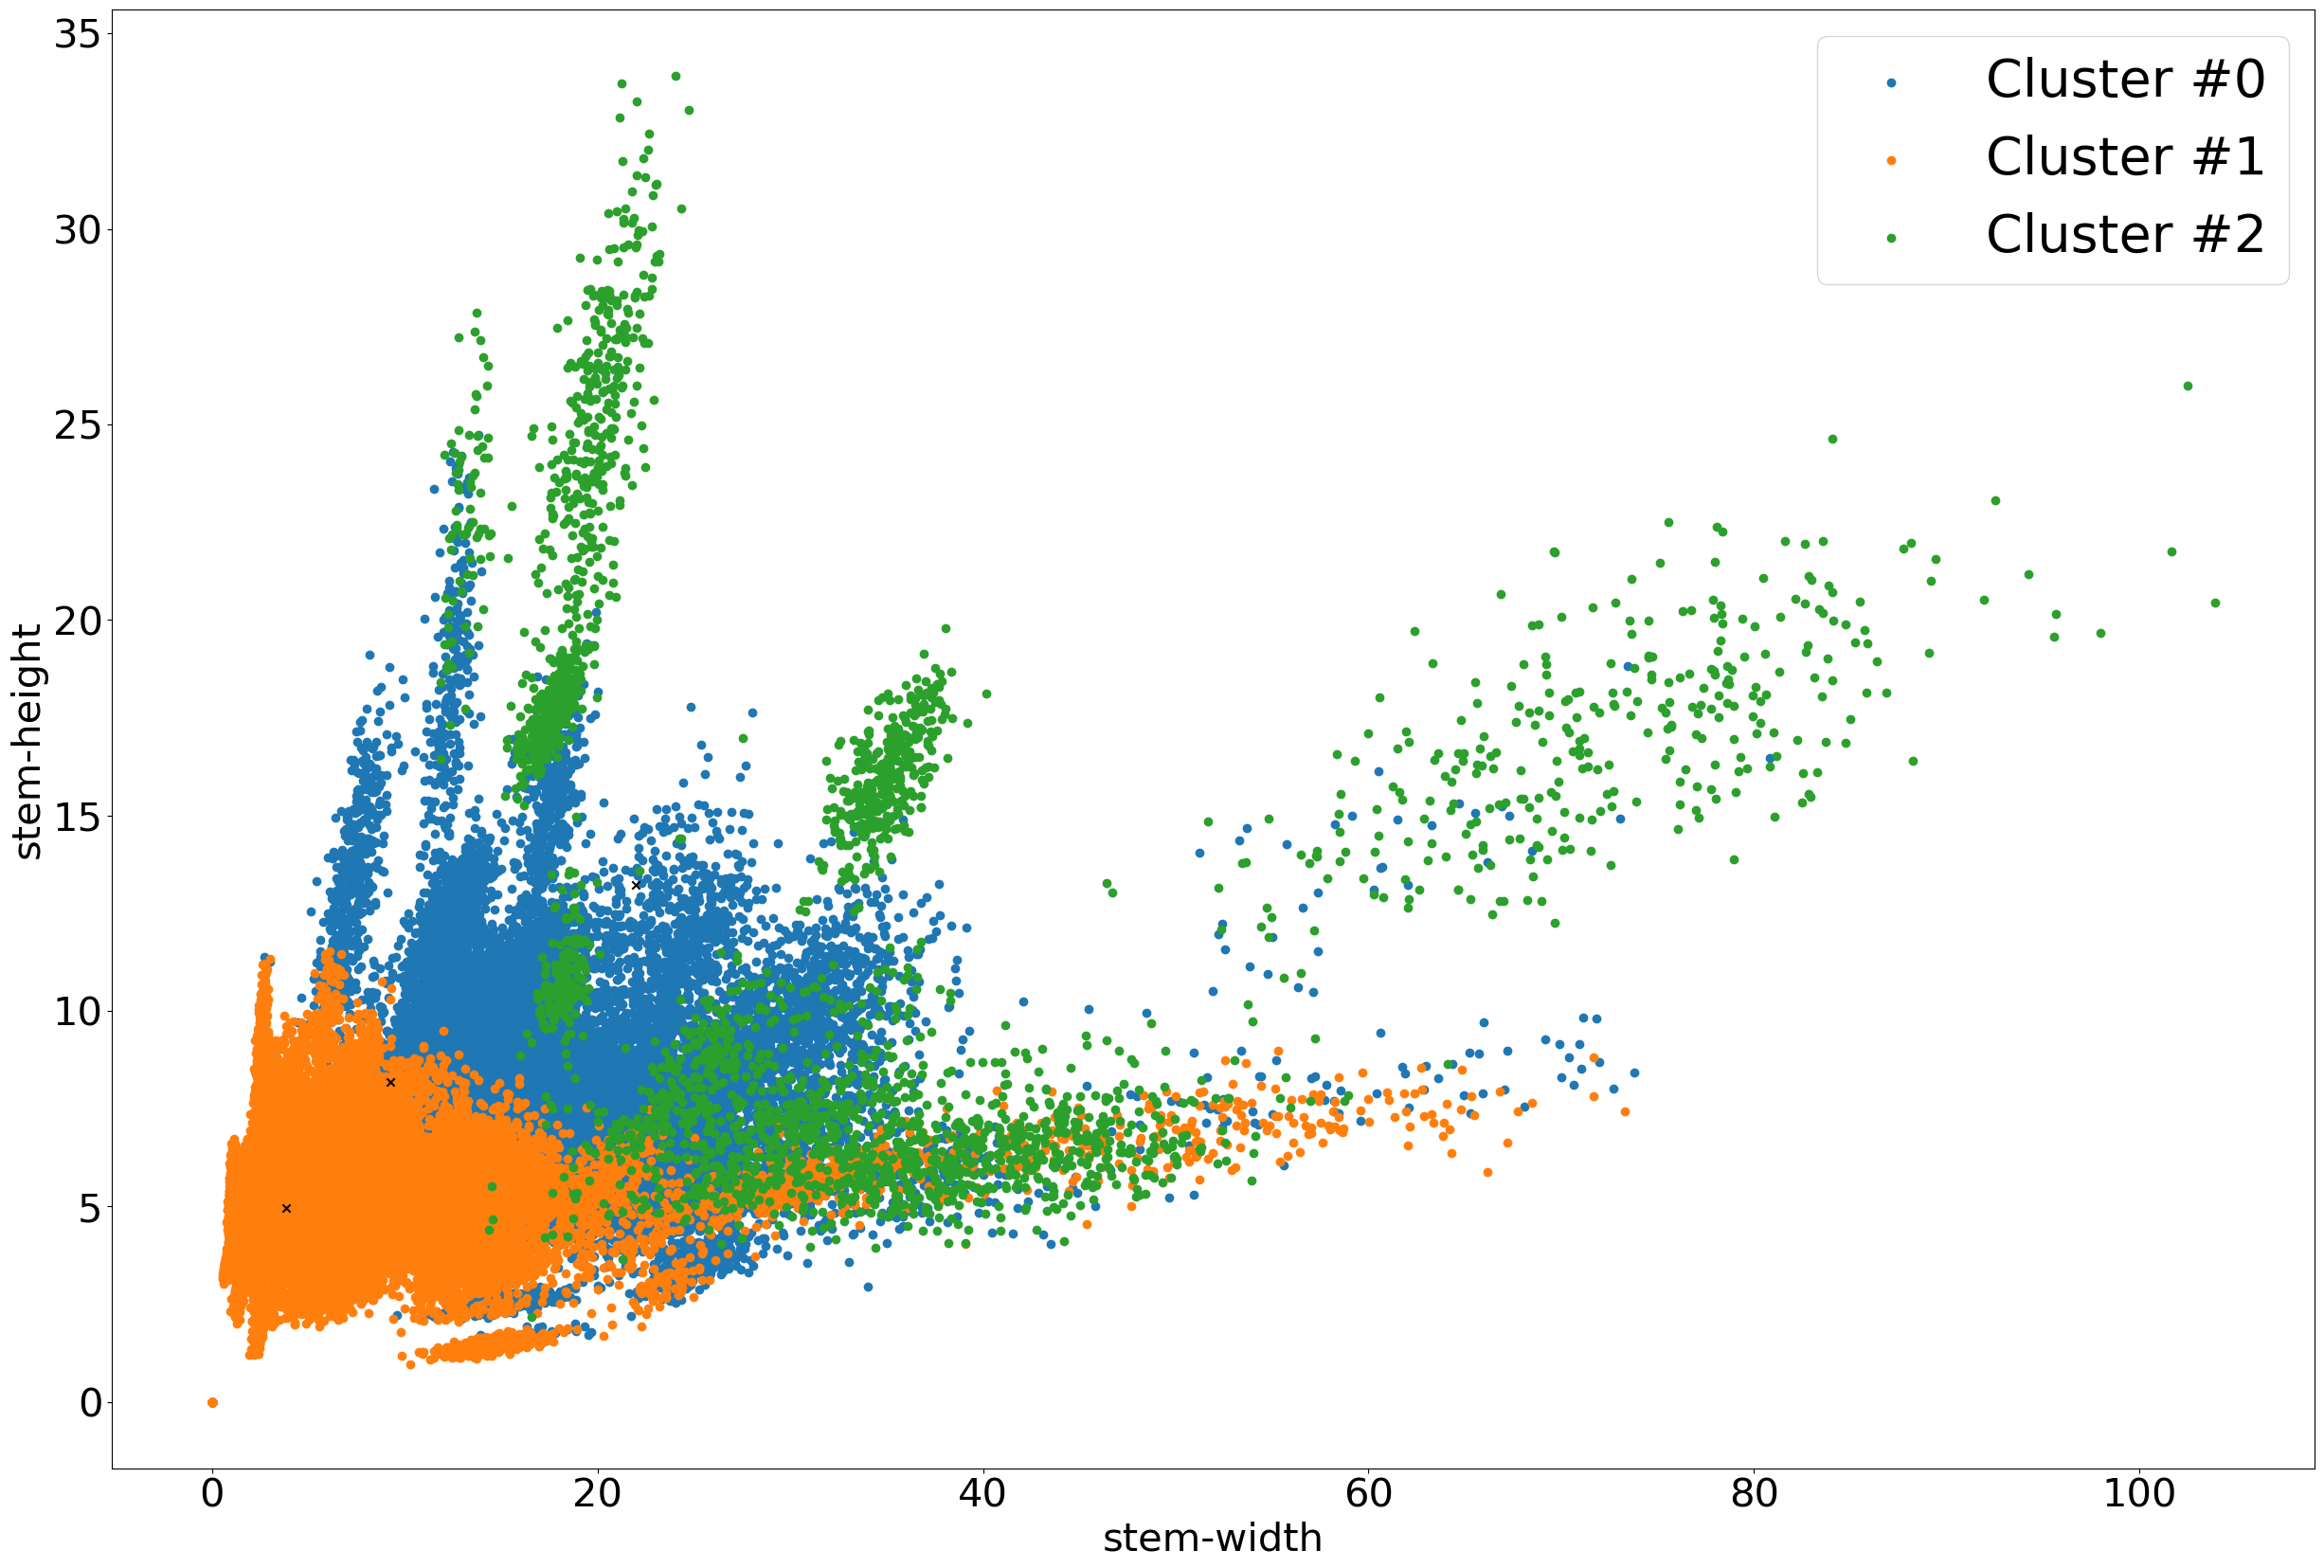

In [57]:
##mstypes=['edible', 'poisonous']
x_axis = 'stem-width'
y_axis = 'stem-height'

plt.figure(figsize=(30,20))

for centroid_id, centroid in enumerate(centroids):
    current_examples_indices = (closest_centroids_ids == centroid_id).flatten()
    plt.scatter(
        data[x_axis][current_examples_indices],
        data[y_axis][current_examples_indices],
        label='Cluster #' + str(centroid_id)
    )

# Plot clusters centroids.
for centroid_id, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], c='black', marker='x')
    
plt.tick_params(axis='x', labelsize=30)    
plt.tick_params(axis='y', labelsize=30)
plt.xlabel(x_axis, size=30)
plt.ylabel(y_axis, size=30)
plt.legend(fontsize=40)

# Show all subplots.
plt.show()

______________________________________________________